In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [54]:
data=pd.read_csv("./archive/singapore_airlines_reviews.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [55]:
data.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [56]:
data['type'].unique()

array(['review'], dtype=object)

In [57]:
data.columns

Index(['published_date', 'published_platform', 'rating', 'type', 'text',
       'title', 'helpful_votes'],
      dtype='object')

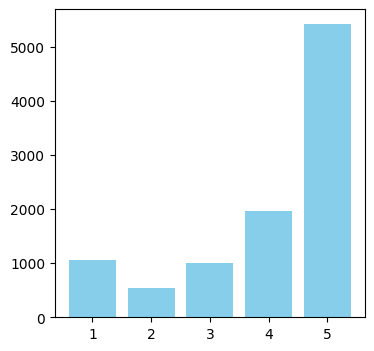

In [58]:

reviews=data['rating'].value_counts().reset_index()

plt.figure(figsize=(4, 4))
plt.bar(reviews['rating'], reviews['count'], color='skyblue')
plt.show()

In [59]:
data['published_date']=pd.to_datetime(data['published_date'],utc=True)
data['day'] = data['published_date'].dt.day_name()

Now We can START FOR THE SENTI ANALYSIS



In [60]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import re
import string

Preprocessing data

tokenising and stop wordremoval

In [61]:
stop_words=set(stopwords.words('english'))
def preprocess(text):
    text=text.lower()
    text=re.sub('\s+',' ',text)
    text=re.sub('\n','',text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    
    token=nltk.word_tokenize(text)
    tokens=[r for r in token if r.isalpha() and r not in stop_words]
    
    return " ".join(tokens)

In [62]:
preprocess(data["text"][0])

'used airline go singapore london heathrow issues tickets cancelled one tickets trying get sorted cost lot money due roaming charges lengthy phone calls needed get ticket reinstated trying charge varying amounts resolve poor service got airport check desk due issue meant online check done premium economy spacious two seats either side plane seats middle plane seemed relatively new brand new legroom good seats wider bigger arm rest two seats fold away tray tables good choice movies things tv shows games etc food ok seem much different economy standard flight crew seemed friendly enough really go isles drinks maybe twice whole hour flight airlines would done quite often overall flight ok seats comfy legroom good food ok flight crew could attentive especially premium economy would expect service slightly better economy'

In [63]:
data['preprocessed_text']=data['text'].apply(preprocess)

Encode the Text Data using TF-IDF:



In [64]:
# Encode the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(data['preprocessed_text']).toarray()

Standardizing the numerical feature using StandardScaler is a step that scales the numerical data to have a mean of 0 and a standard deviation of 1. 

In [65]:
X_numerical = data[['helpful_votes']].values
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)

X_combined = np.hstack((X_numerical, X_tfidf))


We can directly use the rating column of thr model training or we can just the label encoder (which just maps the unique integers starting from 0. )

In [66]:

le = LabelEncoder()
y = le.fit_transform(data['rating'])
y

array([2, 4, 0, ..., 4, 3, 3])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


In [68]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [69]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.6575
